<a href="https://colab.research.google.com/github/evertonrca/Data-Science-Projects/blob/main/Categoria_de_renda_(predicao).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de predição de categoria de renda

**Note: The graphics were built using the library plotly, to view them correctly open the notebook with the collaboratory by clicking on the link above "Open in colaboratory".**

**Observação: Os gráficos foram construídos utilizando a biblioteca plotly, para visualizá-los  corretamente abra o notebook com o colaboratory clicando no link acima "Open in colaboratory".**


**Apresentação**

Este projeto foi desenvolvido com a premissa de identificar a qual categoria de renda a pessoa pertence, ou seja, se possui uma renda acima ou abaixo de 50 mil dólares por ano.
O dataset utilizado está disponível no link https://archive.ics.uci.edu/ml/datasets/Adult e pertence ao Repositório de Aprendizado de Máquina da UCI. A proposta de utilização do repositório foi feita pelos ministrantes do Curso Data Science do Zero como forma de desafio e aprendizagem. A seguir, segue a análise do dataset feita por mim aplicando alguns conhecimentos obtidos.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando bibliotecas que serão utilizadas

In [ ]:
!pip install plotly==4.14.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import plotly.figure_factory as ff
from sklearn.feature_selection import mutual_info_classif, SelectKBest, SelectPercentile, chi2
from sklearn.model_selection  import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pickle
import urllib.request

## Conhecendo a Base de Dados a ser trabalhada

In [ ]:
# Importando 
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Data Science do Zero/ProjetoML01/Materiais_de_Apoio_ProjetoML01/adult.data')

**age**: Idade.

**workclass**: Classe trabalhadora. Se a pessoa é funcionário público, autônomo, empresário etc.

**education**: Níveis de Escolaridade.

**education-num**: Código do Nível de Escolaridade.

**marital-status**: Estado Civil.

**occupation**: Ocupação (Suporte técnico, Conserto de arte, Outros serviços, Vendas, Exec-managerial, Prof-specialty, Manipuladores de limpeza, Machine-op-inspct, Adm-clerical, Pesca agropecuária, Transport-moving, Priv-house-serv, Serviço de Proteção, Forças Armadas)

**relationship**: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

**race**: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

**sex**: Sexo(Feminino, Masculino).

**capital-gain**: Ganho de Capital.

**capital-loss**: Perda de Capital.

**hours-per-week**: Horas de trabalho por Semana.

**native-country**: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc)

In [ ]:
df.head()

age  workclass     education  ...  hours-per-week native-country income
0   25    Private          11th  ...              40  United-States  <=50K
1   38    Private       HS-grad  ...              50  United-States  <=50K
2   28  Local-gov    Assoc-acdm  ...              40  United-States   >50K
3   44    Private  Some-college  ...              40  United-States   >50K
4   18          ?  Some-college  ...              30  United-States  <=50K

[5 rows x 14 columns]

In [ ]:
df.count()

age                48842
workclass          48842
education          48842
educational-num    48842
marital-status     48842
occupation         48842
relationship       48842
race               48842
sex                48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     48842
income             48842
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   sex              48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   48842 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [ ]:
# convertendo as colunas object para categoricos com a finalidade de economizar espaço em memória:
for coluna in df.columns:
  if df.dtypes[coluna] == object:
    df[coluna] = df[coluna].astype('category')

In [ ]:
df.info()
#Percebe-se que houve redução de mais de 50% na memória utilizada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  int64   
 1   workclass        48842 non-null  category
 2   education        48842 non-null  category
 3   educational-num  48842 non-null  int64   
 4   marital-status   48842 non-null  category
 5   occupation       48842 non-null  category
 6   relationship     48842 non-null  category
 7   race             48842 non-null  category
 8   sex              48842 non-null  category
 9   capital-gain     48842 non-null  int64   
 10  capital-loss     48842 non-null  int64   
 11  hours-per-week   48842 non-null  int64   
 12  native-country   48842 non-null  category
 13  income           48842 non-null  category
dtypes: category(9), int64(5)
memory usage: 2.3 MB


In [ ]:
# Conhecendo um pouco mais sobre os dados, desvio padrão, média, quartis
df.describe()

age  educational-num  ...  capital-loss  hours-per-week
count  48842.000000     48842.000000  ...  48842.000000    48842.000000
mean      38.643585        10.078089  ...     87.502314       40.422382
std       13.710510         2.570973  ...    403.004552       12.391444
min       17.000000         1.000000  ...      0.000000        1.000000
25%       28.000000         9.000000  ...      0.000000       40.000000
50%       37.000000        10.000000  ...      0.000000       40.000000
75%       48.000000        12.000000  ...      0.000000       45.000000
max       90.000000        16.000000  ...   4356.000000       99.000000

[8 rows x 5 columns]

# Análise exploratória via gráficos

In [ ]:
# Verificando os valores da categoria alvo de predição do modelo
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [ ]:
# Visualizando a distribuição das classes de renda

#graf1 = go.Histogram(x = df.income, name='Renda', marker=dict(color=['skyblue','lightblue']))
#graf1 = go.Histogram(x = df.income, name='Renda', marker=dict(color=plotly.colors.sequential.Darkmint))
#fig = go.Figure(graf1)

#Títulos
#fig.update_layout(xaxis_title = '<b>Categoria',
#                  yaxis_title = '<b>Pessoas',
#                  title = '<b>Categoria de Renda',
#                  title_font_size = 25,
#                  title_x = .5,
#                  title_y = .95,
#                  width = 700,
#                  height = 500)

#fig.update_traces(marker_line_width=1)

#fig.update_coloraxes(colorscale='Blues')
#Background
#fig.update_layout(#paper_bgcolor='#FFFAFA',
#                  plot_bgcolor='#F5F5F5'
#                  )

#fig.show(renderer = 'colab')

#---------------------------------------------------------------------------------------------------------------

# O plot do gráfico de pizza parece ser mais adequado para a visualização

labels = df.income.unique()
data = go.Pie(values=df.income.value_counts(), 
              name='Categoria', 
              labels=labels,
              pull=[0.05, 0, 0, 0, 0, 0, 0],
              textinfo = 'label+percent',
              insidetextorientation='radial',
              #hovertext = 'Categoria', 
              hoverinfo = 'label+percent+text+value+name'
              )
fig = go.Figure(data=data)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.5)))

fig.update_layout(title = 'Categoria de Renda',
                  title_font_size = 25,
                  title_x = 0.5,
                  plot_bgcolor='#F5F5F5',
                  width = 1200,
                  height = 600
                  )

fig.update_layout({'legend_title':'<b>Renda'})

fig.show()

In [ ]:
# Verificando os valores de cada classe do Nível Educacional
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
# Identificando níveis de escolaridade
# paletas de cores https://plotly.com/python/builtin-colorscales/
fig = go.Figure()

fig.add_traces(go.Histogram(x = df.education, 
                            name='Educação', 
                            marker=dict(color = plotly.colors.cyclical.mygbm_r),
                            hoverinfo = 'all'
                            ))

#color=plotly.colors.sequential.Darkmint
#color=['skyblue','lightblue']

fig.update_layout(xaxis_title = '<b>Nível Educacional',
                  yaxis_title = '<b>Pessoas',
                  title = 'Nível Educacional',
                  title_font_size = 25,
                  title_x = 0.5,
                  plot_bgcolor='#F5F5F5',
                  )

fig.update_traces(marker_line_width = 1.5)
fig.data[0].marker.line.color = "black"

fig.show()

In [ ]:
# Verificando os números plotados no gráfico por categoria
df.education.groupby(by = df.income).value_counts()

income  education   
<=50K   HS-grad         13281
        Some-college     8815
        Bachelors        4712
        11th             1720
        Assoc-voc        1539
        10th             1302
        Masters          1198
        Assoc-acdm       1188
        7th-8th           893
        9th               715
        12th              609
        5th-6th           482
        1st-4th           239
        Prof-school       217
        Doctorate         163
        Preschool          82
>50K    Bachelors        3313
        HS-grad          2503
        Some-college     2063
        Masters          1459
        Prof-school       617
        Assoc-voc         522
        Doctorate         431
        Assoc-acdm        413
        11th               92
        10th               87
        7th-8th            62
        12th               48
        9th                41
        5th-6th            27
        1st-4th             8
        Preschool           1
Name: education, dt

* Nota-se que pessoas que possuem bacharelado, dentre as outras categorias, são as que mais ultrapassam a renda de 50 mil por ano, enquanto que a categoria que possui mais pessoas no geral é a HS

In [ ]:
# Identificando níveis de escolaridade
# paletas de cores https://plotly.com/python/builtin-colorscales/

fig = px.histogram(df, x = 'education', 
                   color=df.income,
                   labels = dict(income = 'Categoria'),                 
                   )

fig.update_layout(xaxis_title = '<b>Nível Educacional',
                  yaxis_title = '<b>Pessoas',
                  title = 'Nível Educacional e Categoria de Renda',
                  title_font_size = 25,
                  title_x = 0.45,
                  width = 1200,
                  plot_bgcolor='#F5F5F5',
                  )

fig.update_traces(marker_line_width = 1)
fig.data[0].marker.line.color = "black"
fig.update_layout({'legend_title':'<b>Renda'})

fig.show()

In [ ]:
# Identificando o nível de trabalho semanal
df['hours-per-week'].groupby(df.income).value_counts().head(100)

income  hours-per-week
<=50K   40                17953
        50                 2345
        20                 1750
        45                 1710
        35                 1653
                          ...  
>50K    40                 4850
        50                 1901
        45                 1007
        60                  954
        55                  490
Name: hours-per-week, Length: 100, dtype: int64

* Nota-se que a grande maioria dos entrevistados trabalha 40 horas por semana

In [ ]:
# Vamos procurar alguma relação nas horas de trabalho semanais com o ganho de capital
fig  = px.histogram(df, x = 'hours-per-week', color='income')

fig.update_layout(xaxis_title = '<b>Horas trabalhadas',
                  yaxis_title = '<b>Pessoas',
                  title = 'Horas Trabalhadas por Semana e Nível de Renda',
                  title_font_size = 25,
                  title_x = 0.5,
                  width = 1700,
                  plot_bgcolor='#F5F5F5'                
                  )

fig.update_traces(marker_line_width = 0.45)
fig.data[0].marker.line.color = "black"

fig.update_layout({'legend_title':'<b>Renda'})

# Plotar
fig.show()

* As pessoas que ganham acima de 50k tendem a estar distribuídas, em grande maioria, nas cargas de trabalho de 40 horas ou mais

---



In [ ]:
# Verificando a ocupação dos entrevistados
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
df['occupation'].groupby(df.income).value_counts()

income  occupation       
<=50K   Adm-clerical         4843
        Craft-repair         4729
        Other-service        4719
        Sales                4029
        Prof-specialty       3388
        Exec-managerial      3178
        Machine-op-inspct    2650
        ?                    2544
        Handlers-cleaners    1934
        Transport-moving     1874
        Farming-fishing      1317
        Tech-support         1026
        Protective-serv       675
        Priv-house-serv       239
        Armed-Forces           10
>50K    Exec-managerial      2908
        Prof-specialty       2784
        Sales                1475
        Craft-repair         1383
        Adm-clerical          768
        Transport-moving      481
        Tech-support          420
        Machine-op-inspct     372
        Protective-serv       308
        ?                     265
        Other-service         204
        Farming-fishing       173
        Handlers-cleaners     138
        Armed-Forces  

In [ ]:
#Plotando o gráfico de ocupação
fig = px.histogram(df, x = 'occupation', color = 'income')

fig.update_layout(title = '<b>Categoria de Renda por Ocupação',
                  xaxis_title = '<b>Ocupação',
                  yaxis_title = '<b>Pessoas',
                  title_x = 0.45,
                  plot_bgcolor='#F5F5F5')

fig.update_traces(marker_line_width = 1)
fig.data[0].marker.line.color = "black"

fig.update_layout({'legend_title':'<b>Renda'})

fig.show()

* Fica perceptível que, proporcionamente falando, as ocupações com maior número de pessoas que possuem renda acima de 50K são Exec-managerial e Prof-specialty

In [ ]:
# Criando grupos de idade para facilitar a visualização
#Tradicionalmente, uma população é dividida em três faixas etárias:
#Jovens - Indivíduos de até 19 anos;
#Adultos - Indivíduos com idade entre 20 até 59 anos;
#Idosos - Indivíduos de 60 anos em diante.

df['class_age'] = pd.cut(df['age'],[0,19,60,91], labels =['young','adult','old'])


In [ ]:
df.head()

age  workclass     education  ...  native-country income class_age
0   25    Private          11th  ...   United-States  <=50K     adult
1   38    Private       HS-grad  ...   United-States  <=50K     adult
2   28  Local-gov    Assoc-acdm  ...   United-States   >50K     adult
3   44    Private  Some-college  ...   United-States   >50K     adult
4   18          ?  Some-college  ...   United-States  <=50K     young

[5 rows x 15 columns]

In [ ]:
fig = px.histogram(df, 
                   x = 'class_age',
                   color = 'income',
                   facet_col = 'sex',
                   barmode='group'
                   )

fig.update_layout(width = 1000,
                  height = 600,
                  title = '<b>Relação Idade e Renda',
                  title_x = 0.5,
                  plot_bgcolor='#F5F5F5'
                  )

fig.update_traces(marker_line_width = 1)
fig.data[0].marker.line.color = "black"

fig.update_layout({'legend_title':'<b>Renda'})

fig.show()

In [ ]:
df['marital-status'].groupby(df.sex).value_counts()

sex     marital-status       
Female  Never-married             7218
        Divorced                  4001
        Married-civ-spouse        2480
        Widowed                   1233
        Separated                  931
        Married-spouse-absent      304
        Married-AF-spouse           25
Male    Married-civ-spouse       19899
        Never-married             8899
        Divorced                  2632
        Separated                  599
        Married-spouse-absent      324
        Widowed                    285
        Married-AF-spouse           12
Name: marital-status, dtype: int64

In [ ]:
fig = px.histogram(df, 
                   x = 'marital-status',
                   color = 'income',
                   facet_col = 'sex',
                   barmode='group',
                   )

fig.update_layout(width = 1500,
                  height = 600,
                  title = '<b>Estado Civil e Renda',
                  title_x = 0.5,
                  plot_bgcolor='#F5F5F5'
                  )

fig.update_traces(marker_line_width = 1)
fig.data[0].marker.line.color = "black"

fig.update_layout({'legend_title':'<b>Renda'})

fig.show()

* Outra observação interessante é que pessoas casadas/cônjuges são as que mais estão enquadradas com categoria de renda acima de 50k

In [ ]:
# Verificando a distribuição de idade dos dados
fig = px.histogram(df, x = df.age,
             orientation = 'v',
             marginal = 'box',
             color_discrete_sequence=['indianred']
             )

fig.update_layout(width = 1650,
                  height = 600,
                  title = '<b>Distribuição de Idade',
                  title_x = 0.5,
                  xaxis_title = '<b>Idade',
                  yaxis_title = '<b>Pessoas',
                  plot_bgcolor='#F5F5F5'
                  )

fig.update_traces(marker_line_width = 1)
fig.data[0].marker.line.color = "black"

fig.show()

* Percebe-se que a maior concentração de idades está entre os 28 e 48 anos, mostrando possíveis outliers após os 78 anos de idade

In [ ]:
#Construindo a relação de Raça e Renda, considerando-se o Sexo 
fig = px.histogram(df, 
                   x = 'race',
                   color = 'income',
                   facet_col = 'sex'
                   )

fig.update_layout(width = 1000,
                  height = 600,
                  title = '<b>Relação Etnia e Renda separados por Sexo',
                  title_x = 0.5,
                  plot_bgcolor='#F5F5F5'
                  )

fig.update_traces(marker_line_width = 1)
fig.data[0].marker.line.color = "black"

fig.update_layout({'legend_title':'<b>Renda'})

fig.show()

* A Relação entre etnia e renda apresenta pessoas brancas como as que mais estão enquadradas dentro da classe acima de 50 mil, um dos motivos disso pode ser o grande volume de dados de pessoas brancas em relação às demais etinias

In [ ]:
# Plotando a relação entre sexo e renda
fig = px.histogram(df, 
                   y = 'sex',
                   color = 'income',
                   orientation = 'h',
                   barmode = 'group'
                   )

fig.update_layout(width = 1000,
                  height = 400,
                  title = '<b>Relação Sexo e Renda',
                  title_x = 0.5,
                  plot_bgcolor='#F5F5F5',
                  xaxis_title = '<b>Pessoas',
                  yaxis_title = '<b>Sexo'
                  )

fig.update_traces(marker_line_width = 1)
fig.data[0].marker.line.color = "black"

fig.update_layout({'legend_title':'<b>Renda'})

fig.show()

* A maioria dos dados pertencem a homens. Contudo, proporcionalmente falando, os homens tendem a ser maioria na classe acima de 50K

In [ ]:
# Identificando alguns países que não são o EUA
df[df['native-country'] != 'United-States'].head(10)

age         workclass     education  ...      native-country income class_age
19    40           Private     Doctorate  ...                   ?   >50K     adult
23    25           Private     Bachelors  ...                Peru  <=50K     adult
37    22           Private       5th-6th  ...           Guatemala  <=50K     adult
46    39           Private       7th-8th  ...              Mexico  <=50K     adult
54    38           Private           9th  ...              Mexico  <=50K     adult
65    41           Private     Bachelors  ...                   ?  <=50K     adult
72    30           Private       HS-grad  ...              Mexico  <=50K     adult
74    46           Private  Some-college  ...  Dominican-Republic  <=50K     adult
83    44      Self-emp-inc       HS-grad  ...                   ?   >50K     adult
128   27  Self-emp-not-inc       HS-grad  ...             Ireland   >50K     adult

[10 rows x 15 columns]

In [ ]:
# Abrindo o arquivo JSON ded referência para o plot dos gráficos de mapas
f = open(file='/content/drive/MyDrive/Colab Notebooks/Data Science do Zero/world.geo.json-master/countries.geo.json',mode='rb')
conteudo = f.read()
data = json.loads(conteudo)


In [ ]:
df.head()

age  workclass     education  ...  native-country income class_age
0   25    Private          11th  ...   United-States  <=50K     adult
1   38    Private       HS-grad  ...   United-States  <=50K     adult
2   28  Local-gov    Assoc-acdm  ...   United-States   >50K     adult
3   44    Private  Some-college  ...   United-States   >50K     adult
4   18          ?  Some-college  ...   United-States  <=50K     young

[5 rows x 15 columns]

In [ ]:
# Visualização de gráfico global
# Ocorre um problema ao inserir diretamente a coluna do DF, isso deixa o modelo extremamente pesado, 
# sendo assim, foi feito o teste com apenas uma amostra de 100 pessoas.

fig = px.choropleth(locations=df['native-country'].head(100),
                    geojson=data, 
                    locationmode="country names",
                    title="Densidade de entrevistados por país",
                    projection = 'natural earth',
                    color = df['native-country'].head(100)                   
                    )
fig.update_layout({'legend_orientation':'h'})
fig.update_layout({'legend_title':'Países'})
fig.show()

In [ ]:
# Identificando a lista de países
df['native-country'].value_counts().index

CategoricalIndex(['United-States', 'Mexico', '?', 'Philippines', 'Germany',
                  'Puerto-Rico', 'Canada', 'El-Salvador', 'India', 'Cuba',
                  'England', 'China', 'South', 'Jamaica', 'Italy',
                  'Dominican-Republic', 'Japan', 'Guatemala', 'Poland',
                  'Vietnam', 'Columbia', 'Haiti', 'Portugal', 'Taiwan', 'Iran',
                  'Nicaragua', 'Greece', 'Peru', 'Ecuador', 'France',
                  'Ireland', 'Hong', 'Thailand', 'Cambodia', 'Trinadad&Tobago',
                  'Yugoslavia', 'Outlying-US(Guam-USVI-etc)', 'Laos',
                  'Scotland', 'Honduras', 'Hungary', 'Holand-Netherlands'],
                 categories=['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', ...], ordered=False, dtype='category')

* Para que seja possível plotar os gráficos de mapas de maneira mais precisa, é necessário que sejam utilizadas as siglas com código alpha-3, portanto, vamos importar uma tabela oficial e dar um merge com o nosso banco de dados. Além disso, será criada uma nova tabela com o número de ocorrências dos países, ou seja, o número de habitantes de cada um deles.

In [ ]:
# Criando uma nova tabela para os países
df_map = pd.DataFrame(df['native-country'].unique(), columns=['Pais'])

In [ ]:
# Separando os valores de ocorrências de cada país
a = df['native-country'].value_counts()

In [ ]:
# Extraindo o número de ocorrências e criando a nova tabela com as informações dos países
df_map = pd.DataFrame(np.array(a), columns= ['Ocorrencia'])
df_map['Pais'] = a.index
df_map['Ocorrencia'].astype('int64')

0     43832
1       951
2       857
3       295
4       206
5       184
6       182
7       155
8       151
9       138
10      127
11      122
12      115
13      106
14      105
15      103
16       92
17       88
18       87
19       86
20       85
21       75
22       67
23       65
24       59
25       49
26       49
27       46
28       45
29       38
30       37
31       30
32       30
33       28
34       27
35       23
36       23
37       23
38       21
39       20
40       19
41        1
Name: Ocorrencia, dtype: int64

In [ ]:
# Visualizando a nova tabela
df_map.head()

Ocorrencia           Pais
0       43832  United-States
1         951         Mexico
2         857              ?
3         295    Philippines
4         206        Germany

In [ ]:
# importando a lista de siglas dos países:
sigla_pais = pd.read_excel('drive/MyDrive/Colab Notebooks/Data Science do Zero/ProjetoML01/Materiais_de_Apoio_ProjetoML01/códigos dos países.xlsx')

In [ ]:
# Fazendo o merge à nossa nova tabela
df_map = pd.merge(df_map , sigla_pais, how='left', on='Pais')

In [ ]:
# Verificando valores nulos
df_map.isnull().value_counts()

Ocorrencia  Pais   Alpha-3 code
False       False  False           41
                   True             1
dtype: int64

In [ ]:
# Verificando a tabela gerada
df_map.head(50)

Ocorrencia                        Pais Alpha-3 code
0        43832               United-States          USA
1          951                      Mexico          MEX
2          857                           ?          UNK
3          295                 Philippines          PHL
4          206                     Germany          DEU
5          184                 Puerto-Rico          PRI
6          182                      Canada          CAN
7          155                 El-Salvador          SLV
8          151                       India          IND
9          138                        Cuba          CUB
10         127                     England          ENG
11         122                       China          CHN
12         115                       South          ZAF
13         106                     Jamaica          JAM
14         105                       Italy          ITA
15         103          Dominican-Republic          DOM
16          92                       Japan          JPN
17          88                   Guatemala          GTM
18          87                      Poland          POL
19          86                     Vietnam          VNM
20          85                    Columbia          COL
21          75                       Haiti          HTI
22          67                    Portugal          PRT
23          65                      Taiwan          TWN
24          59                        Iran          IRN
25          49                   Nicaragua          NIC
26          49                      Greece          GRC
27          46                        Peru          PER
28          45                     Ecuador          ECU
29          38                      France          FRA
30          37                     Ireland          IRL
31          30                        Hong          HKG
32          30                    Thailand          THA
33          28                    Cambodia          KHM
34          27             Trinadad&Tobago          TTO
35          23                  Yugoslavia          YUG
36          23  Outlying-US(Guam-USVI-etc)          NaN
37          23                        Laos          LAO
38          21                    Scotland          SCO
39          20                    Honduras          HND
40          19                     Hungary          HUN
41           1          Holand-Netherlands          NLD

In [ ]:
# Dropando uma linha com valores nulos
df_map.drop(35, inplace=True)

In [ ]:
# Plotando os gráficos dos paises
# O grando volume de pessoas que reside nos EUA impede que possamos identificar
# os moradores de outros países no mapa, faremos uma conversão no próximo mapa
df2 = px.data.gapminder().query("year==2007")
fig = px.scatter_geo(df_map, locations="Alpha-3 code", 
                     hover_name="Pais",
                     size = 'Ocorrencia', 
                     projection="natural earth")
fig.show()


In [ ]:
# O valor dos EUA impossibilita uma boa visualização do mapa, portanto vamos utilizar o log de 10 para melhorar isso
df2 = px.data.gapminder().query("year==2007")
fig = px.scatter_geo(df_map, locations="Alpha-3 code", 
                     hover_name="Pais",
                     size = np.log10(df_map['Ocorrencia']),
                     color = 'Pais', 
                     projection="natural earth")

fig.update_layout(title = '<b>Concentração de entrevistados',
                  title_font_size = 30,
                  title_x = 0.45,
                  width = 1500,
                  height = 800)

fig.update_layout({'legend_title':'<b>Países'})

fig.show()


In [ ]:
# Concentração de pessoas
fig = px.choropleth(df_map,
                    locations='Alpha-3 code',
                    geojson=data, 
                    locationmode="ISO-3",
                    featureidkey = 'Ocorrencia',
                    title="Densidade de entrevistados por país",
                    projection = 'orthographic',
                    color = np.log10(df_map['Ocorrencia'])                   
                    )

#fig.update_layout({'legend_orientation':'h'})

fig.update_layout(title = '<b>Concentração de entrevistados',
                  title_font_size = 30,
                  title_x = 0.5,
                  width = 1500,
                  height = 800)

fig.show()



# Aplicando o LabelEncoder nas colunas do dataset

In [ ]:
df.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
class_age          0
dtype: int64

In [ ]:
df.dtypes

age                   int64
workclass          category
education          category
educational-num       int64
marital-status     category
occupation         category
relationship       category
race               category
sex                category
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country     category
income             category
class_age          category
dtype: object

In [ ]:
# Será feito o Encoder das variáveis categóricas para aplicação do algoritmo de ML
# Será utilizado o LabelEncoder, pois todas as categorias possuem poucas classes
l_encoder = LabelEncoder()

In [ ]:
# Criando uma lista das categorias de cada classe
cat_colunas = df[df.select_dtypes(['category']).columns]
cat_colunas.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income', 'class_age'],
      dtype='object')

In [ ]:
# Criando uma função que seja capaz de converter as categorias em inteiros
def label_enc (lista):
  for coluna in lista:
    numeros = l_encoder.fit_transform(df[coluna])
    df[coluna] = numeros
  return  

In [ ]:
# Chamando a função
label_enc(cat_colunas)

In [ ]:
# Faremos a junção de duas colunas que tem relação, gerando uma nova coluna
df['capital_total'] = df['capital-gain'] - df['capital-loss']
df.drop(['capital-gain', 'capital-loss', 'age', 'education'], axis = 1, inplace=True)

In [ ]:
df.head()

workclass  educational-num  marital-status  ...  income  class_age  capital_total
0          4                7               4  ...       0          0              0
1          4                9               2  ...       0          0              0
2          2               12               2  ...       1          0              0
3          4               10               2  ...       1          0           7688
4          0               10               4  ...       0          2              0

[5 rows x 12 columns]

In [ ]:
# Verificando os Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   workclass        48842 non-null  int64
 1   educational-num  48842 non-null  int64
 2   marital-status   48842 non-null  int64
 3   occupation       48842 non-null  int64
 4   relationship     48842 non-null  int64
 5   race             48842 non-null  int64
 6   sex              48842 non-null  int64
 7   hours-per-week   48842 non-null  int64
 8   native-country   48842 non-null  int64
 9   income           48842 non-null  int64
 10  class_age        48842 non-null  int64
 11  capital_total    48842 non-null  int64
dtypes: int64(12)
memory usage: 4.5 MB


# Analisando correlações entre as features

In [ ]:
correlacoes = df.corr()
correlacoes

workclass  educational-num  ...  class_age  capital_total
workclass         1.000000         0.055918  ...  -0.110344       0.035344
educational-num   0.055918         1.000000  ...  -0.185404       0.120387
marital-status   -0.068441        -0.069992  ...   0.199683      -0.042005
occupation        0.260005         0.112265  ...  -0.044854       0.023160
relationship     -0.092365        -0.090534  ...   0.110023      -0.053249
race              0.052932         0.029239  ...   0.032226       0.010542
sex               0.091223         0.009328  ...  -0.066375       0.044494
hours-per-week    0.141283         0.143689  ...  -0.315427       0.078962
native-country   -0.008631         0.049107  ...   0.032041      -0.001996
income            0.052674         0.332613  ...  -0.116269       0.214356
class_age        -0.110344        -0.185404  ...   1.000000      -0.013670
capital_total     0.035344         0.120387  ...  -0.013670       1.000000

[12 rows x 12 columns]

In [ ]:
# Plotando um gráfico de correlação entre os dados

z = np.array(correlacoes).round(2)
x = correlacoes.columns.to_list()
y = correlacoes.index.to_list()

# Invertendo matrizes (Por algum motivo o gráfico de heatmap do ff inverte o Y)
z = z[::-1]
y = y[::-1]

fig = ff.create_annotated_heatmap(z,
                                  x = x,
                                  y = y,
                                  showscale=True,
                                  #reversescale=True,
                                  colorscale = 'Greens'                                  
                                  )

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 10

fig.update_layout(title = '<b> Gráfico de Correlação de Variáveis',
                  title_x = 0.5)
#fig.update_annotations()

fig.show()

* Percebe-se que não existem correlações proximas do valor máximo, sendo as mais destacadas em torno de 0.33, onde o nível educacional tem uma maior relação com a renda, seguida pelas horas trabalhadas por semana e capital total

#### Testes de StandardScaler


In [ ]:
# Serão feitos testes para identificar as features mais importantes para o treinamento do modelo
# No primeiro teste será utilizado o scaler para padronização dos dados e num segundo momento será
# feito o teste sem a utilização do scaler

scaler = StandardScaler()
treino = df.drop(columns='income')
classe = df['income']
scaler.fit(treino)
treino2 = scaler.transform(treino)
treino3  = pd.DataFrame(treino2, columns=treino.columns)
X_train, X_test, y_train, y_test = train_test_split(treino3, 
                                                    classe, 
                                                    test_size=0.30, 
                                                    random_state=42,
                                                    )
# Iniciando testes de ML
# Separando dados de teste e treino
best = SelectKBest(mutual_info_classif , k=7).fit(X_train, y_train,)
X_train.columns[best.get_support()]
list(X_train.columns[best.get_support()])

['educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'hours-per-week',
 'capital_total']

In [ ]:
# Iniciando testes de ML
# Separando dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(treino, 
                                                    classe, 
                                                    test_size=0.30, 
                                                    random_state=42,
                                                    )
best = SelectKBest(mutual_info_classif , k=7).fit(X_train, y_train)
X_train.columns[best.get_support()]
list(X_train.columns[best.get_support()])

['educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'hours-per-week',
 'capital_total']

* Por cusiosidade, foi feito o teste com e sem o scaler, as features obtidas foram as mesmas, então o scaler não influenciou na decisão da escolha delas

#### Identificando os melhores parâmetro com SelectkBest para comparar ao Randon Forest

In [ ]:
# Verificando balanceamento dos dados
df.income.value_counts().values/df.income.value_counts().sum()

array([0.76071823, 0.23928177])

In [ ]:
# Criando o modelo para o selectBest, ele trabalha com a utilização de primidade das distancias,
# ocorrendo a partir do vizinho mais próximo
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='income'), 
                                                    df.income, 
                                                    test_size=0.30, 
                                                    random_state=42,
                                                    )

In [ ]:
# Identificando Features principais:
best = SelectKBest(mutual_info_classif, k=6).fit(X_train, y_train)
X_train.columns[best.get_support()]
melhores = list(X_train.columns[best.get_support()])
melhores

['educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'hours-per-week',
 'capital_total']

In [ ]:
# Imprimindo as melhores features
best_features = pd.Series(best.scores_, index=X_train.columns).sort_values(ascending=False)
print(best_features)

capital_total      0.120258
relationship       0.117703
marital-status     0.110930
educational-num    0.066315
occupation         0.059862
hours-per-week     0.042640
sex                0.027610
workclass          0.019233
class_age          0.012489
race               0.011879
native-country     0.008666
dtype: float64


In [ ]:
best.scores_.sum()

0.5975859115588293

In [ ]:
# Plotando o gráfico de importancia das features
def plot_grafico (lista):
  %matplotlib inline
  plt.figure(figsize=(14,8))
  plt.style.use('classic')
  sns.barplot(x = lista, y = lista.index)

  plt.title('Características importantes')
  plt.xlabel('Importância (%)')
  plt.ylabel('Característica')

  plt.show()

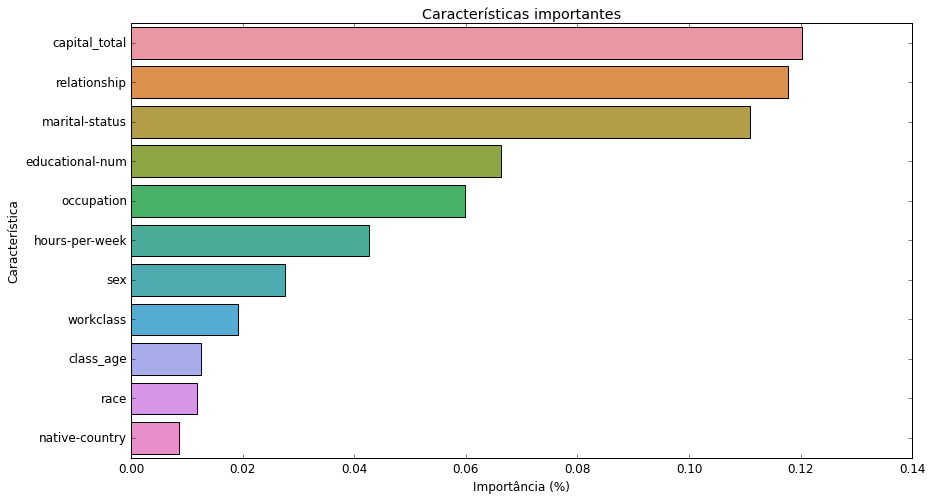

In [ ]:
plot_grafico(best_features)

#### Identificando os melhores parâmetros com random forest

In [ ]:
# Criando um modelo random forest para identificar os melhores parametros
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
best_features = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(best_features)

capital_total      0.214276
educational-num    0.161604
hours-per-week     0.147936
relationship       0.142039
marital-status     0.098449
occupation         0.095461
workclass          0.059128
native-country     0.030670
race               0.023126
sex                0.014175
class_age          0.013137
dtype: float64


In [ ]:
# Observando o score do modelo
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11233
           1       0.72      0.62      0.67      3420

    accuracy                           0.86     14653
   macro avg       0.80      0.77      0.79     14653
weighted avg       0.85      0.86      0.85     14653



In [ ]:
# Acurácia
clf.score(X_test,y_test)

0.855114993516686

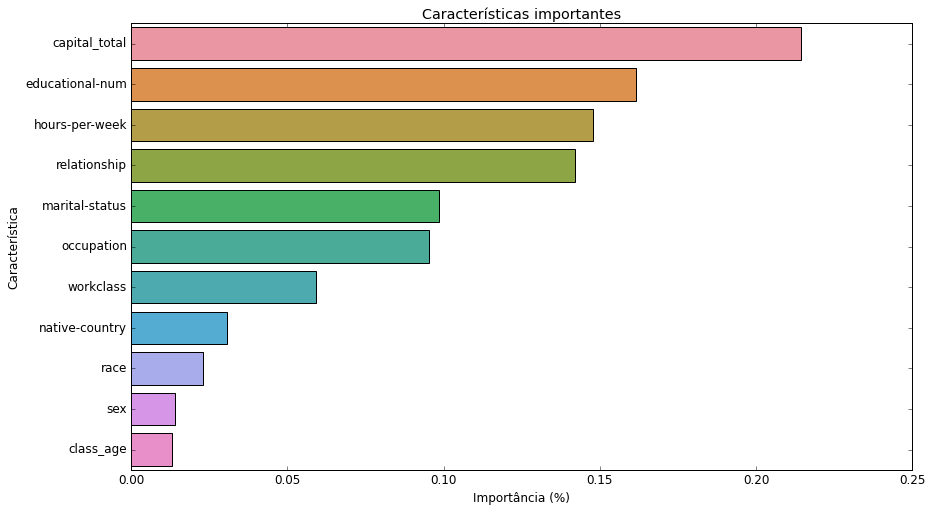

In [ ]:
plot_grafico(best_features)

* Ficou evidente que as features mais importantes em ambos os testes foram: 
educational-num, marital-status, occupation, relationship, hours-per-week, capital_total.

# Escolhendo um modelo através de pipelines

**Em ambas as análises as 6 primeiras features apresentaramm-se como mais importantes para o modelo. Portanto, utilizaremos elas no algoritmo. Aqui iremos identifcar qual algoritmo tem melhor desempenho em classificar a faixa de renda das pessoas**

In [ ]:
# Features utilizadas
treino = df[melhores]
classe = df['income']

In [ ]:
# Criando as Pipelines
pip_1 = ['KNN',  Pipeline([('Scaler_KNN', 
                  StandardScaler()), 
                  ('clf', KNeighborsClassifier())
                  ])]
pip_2 = ['SVM',  Pipeline([('Scaler_SVM', 
                  StandardScaler()), 
                  ('clf', SVC())
                  ])]
pip_3 = ['Gaussian NB', Pipeline([('Scaler_GaussianNB', 
                  StandardScaler()), 
                  ('clf', GaussianNB())
                  ])]
pip_4 = ['Decisioon Tree Classifier',  Pipeline([('Scaler_DecisionTreeClassifier', 
                  StandardScaler()), 
                  ('clf', DecisionTreeClassifier())
                  ])]
pip_5 = ['Random Forest Classifier',  Pipeline([('Scaler_RandomForestClassifier', 
                  StandardScaler()), 
                  ('clf', RandomForestClassifier())
                  ])]
    
pipelines = [pip_1, pip_2, pip_3, pip_4, pip_5 ]


# Rodando os algoritmos 
todas_predicoes_acuracia = list()
Nomes_modelos = list()
todas_predicoes_acuracia_plot = list()

for nome_modelo, pred in pipelines:
  predicoes_cross_accuracy = cross_val_score(pred, treino, classe, cv=5)
  predicoes_cross = cross_val_predict(pred, treino, classe, cv=5)

  report = classification_report(classe, predicoes_cross)
  print(f'<b>Report para: {nome_modelo}', f'\n{report}', f'\n<b>Acurácia: {predicoes_cross_accuracy.mean()}\n\n')
  
  Nomes_modelos.append(nome_modelo) 
  todas_predicoes_acuracia.append(predicoes_cross_accuracy.mean())
  todas_predicoes_acuracia_plot.append(predicoes_cross_accuracy)

<b>Report para: KNN 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     37155
           1       0.68      0.58      0.63     11687

    accuracy                           0.83     48842
   macro avg       0.78      0.75      0.76     48842
weighted avg       0.83      0.83      0.83     48842
 
<b>Acurácia: 0.8344049572143544


<b>Report para: SVM 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     37155
           1       0.76      0.51      0.61     11687

    accuracy                           0.84     48842
   macro avg       0.81      0.73      0.76     48842
weighted avg       0.84      0.84      0.83     48842
 
<b>Acurácia: 0.8447852832871771


<b>Report para: Gaussian NB 
              precision    recall  f1-score   support

           0       0.81      0.98      0.88     37155
           1       0.77      0.26      0.39     11687

    accuracy                           0.

In [ ]:
resultados = pd.Series(todas_predicoes_acuracia, index=Nomes_modelos).sort_values(ascending = False)
resultados

Random Forest Classifier     0.854879
Decisioon Tree Classifier    0.849372
SVM                          0.844785
KNN                          0.834405
Gaussian NB                  0.804185
dtype: float64

**Observa-se que os modelos com melhores resultados de acurácia são:
Random Forest e Decision Tree**

# Utilizando o GridSearch para configurar os melhores parâmetros para os algoritmos de melhor resultado

* Os parâmetros podem influenciar significativamente no desempenho em alguns casos.

In [ ]:
# Crianndo os parâmetros que serão utilizados no algoritmo
criterion = ['gini', 'entropy']
min_samples_leaf = [1, 3, 5, 7, 10]
#min_samples_split = [2, 5, 7, 10]
max_depth = [10, 50, 100, 150]
n_estimators = [10, 30, 50, 100]

#### Random Forest

In [ ]:
# Atribuindo parâmetros e criando os modelos
parametros_grid = dict(n_estimators = n_estimators,
                       criterion = criterion,
                       min_samples_leaf = min_samples_leaf,
                       #min_samples_split = min_samples_split,
                       max_depth = max_depth)

modelo_randomforest = RandomForestClassifier()
modelo_DecTree = DecisionTreeClassifier()

st_scaler = StandardScaler()
treino_standard = st_scaler.fit_transform(treino)

In [ ]:
grid = GridSearchCV(estimator = modelo_randomforest, 
                    param_grid = parametros_grid,
                    scoring = 'accuracy',
                    cv = 5, 
                    )
grid.fit(treino_standard, classe)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(f' Melhores parâmetros para o Decision Tree: \n{grid.best_params_}')

 Melhores parâmetros para o Decision Tree: 
{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 3, 'n_estimators': 50}


In [ ]:
print(f' Melhor score para o Decision Tree: {grid.best_score_.round(2)*100}%')

 Melhor score para o Decision Tree: 86.0%


#### **Decision Tree**

In [ ]:
max_depth = range(1,50)

In [ ]:
parametros_grid2 = dict(#n_estimators = n_estimators,
                       criterion = criterion,
                       min_samples_leaf = min_samples_leaf,
                       #min_samples_split = min_samples_split,
                       max_depth = max_depth)

In [ ]:
grid2 = GridSearchCV(estimator = modelo_DecTree,
                   param_grid = parametros_grid2,
                   scoring = 'accuracy',
                   cv = 5)
grid2.fit(treino_standard, classe)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
grid2.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(f' Melhores parâmetros para o Decision Tree: \n{grid2.best_params_}')

 Melhores parâmetros para o Decision Tree: 
{'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 10}


In [ ]:
print(f' Melhor score para o Decision Tree: {grid2.best_score_.round(2)*100}%')

 Melhor score para o Decision Tree: 86.0%


**Os melhores modelos foram o RF e DT, porém quando treinados utilizando as pipelines de parâmetros, foi possível notar que o resultado final para ambos foi praticamente o mesmo, sendo assim, escolheremos o Decision tree por ser um modelo muito mais rápido no momento de realizar o treinamento e por seu nível menor de complexidade**

In [ ]:
# Criando o modelo com os melhores parâmetros identificados
arvore = DecisionTreeClassifier(criterion='entropy',
                                max_depth=16,
                                min_samples_leaf=10)
arvore.fit(X = treino_standard, y = classe)
resultado = cross_val_predict(estimator = arvore, X = treino_standard, y = classe, cv=5)
resultado_acuracia = cross_val_score(estimator = arvore, X = treino_standard, y = classe, cv=5)

# Acurácia
print(f'Valor de acurácia: {resultado_acuracia.mean().round(2)*100}%\n\n')

# Report
print(f'Report:\n{classification_report(classe, resultado)}\n\n')

# Matriz Confusão
print ('Matriz confusão:\n',pd.crosstab(classe, resultado, rownames=['Real'], colnames=['         Predito'], margins=True))

Valor de acurácia: 86.0%


Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     37155
           1       0.77      0.58      0.66     11687

    accuracy                           0.86     48842
   macro avg       0.83      0.76      0.79     48842
weighted avg       0.85      0.86      0.85     48842



Matriz confusão:
          Predito      0     1    All
Real                                
0                 35169  1986  37155
1                  4884  6803  11687
All               40053  8789  48842


# **Criando Persistência de modelo**

In [ ]:
#Salvando modelo como Arvore_Decisao.sav
pickle.dump(arvore, open('Arvore_Decisao.sav', 'wb'))
pickle.load(open('Arvore_Decisao.sav', 'rb'))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=150, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Concluindo**: De acordo com o apresentado na análise exploratória, foi possível notar que as pessoas classificadas com renda acima de 50K, na maioria das vezes, tendem a possuir as seguintes características: possuem nível de escolaridade de bacharelado, trabalham 40 horas semanais ou mais, possuem os cargos de Exec-managerial e Prof-specialty, e são pessoas que possuem cônjuge. Este seria o perfil procurado para uma empresa que desejasse obter clientes com renda anual acima de 50 mil dólares. 
Quanto ao gráfico de correlação, as features que possuem maior correlação com a feature alvo são: nível educacional, horas trabalhadas por semana e capital total. 
No que diz respeito ao modelo, as features com maior importância no momento do treinamento são: educational-num, marital-status, occupation, relationship, hours-per-week, capital_total. Os modelos de árvore de decisão e floresta aleatória se destacaram perante os demais, contudo, árvore de decisão possui complexidade e tempo de treinamento menor, além de apresentar a mesma acurácia que o floresta aleatória. Portando, o modelo escolhido foi o de árvore de decisão.
